In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import math

In [2]:
# Location of raw data in hard drive
folder_location = 'D:/University/MSc Civil Engineering/Research/Data/NumericalData/Field_visit_2022/Raw Data/'
filename = 'Raw_data_consolidated Cleaned.xlsx'

file_path = folder_location + filename

# 1 sheet per sensor. The sheet names are:
# Ext1_067, Ext2_068, Rock_Temp, Facade, Roof
ext1_df_raw = pd.read_excel(file_path, sheet_name='Ext1_067')
ext2_df_raw = pd.read_excel(file_path, sheet_name='Ext2_068') 

ext1_df_raw = ext1_df_raw.drop_duplicates(subset='Datetime')
ext2_df_raw = ext2_df_raw.drop_duplicates(subset='Datetime')

ext1_df_raw['diff'] = ext1_df_raw.Cr_Ap.diff()
ext1_df_raw['Cr_Disp'] = ext1_df_raw['diff'].cumsum()

ext2_df_raw['diff'] = ext2_df_raw.Cr_Ap.diff()
ext2_df_raw['Cr_Disp'] = ext2_df_raw['diff'].cumsum()
 

In [3]:
ext_end_date = pd.to_datetime('2019-08-17')
pl = ext1_df_raw.loc[ext1_df_raw['Datetime'] < ext_end_date]
ext2_df = ext2_df_raw[ext2_df_raw['Datetime'] < ext_end_date]

In [4]:
pd.set_option('max_colwidth', 100)
ext1_df_raw.tail(100)

,Datetime,Air_Temp,Cr_Ap,diff,Cr_Disp
2966,2019-08-13 17:51:00,32.1,4852,-1.0,-236.0
2967,2019-08-13 18:51:00,32.1,4852,0.0,-236.0
2968,2019-08-13 19:51:00,32.1,4852,0.0,-236.0
2969,2019-08-13 20:51:00,32.0,4852,0.0,-236.0
2970,2019-08-13 21:51:00,32.0,4852,0.0,-236.0
...,...,...,...,...,...
3061,2021-01-08 16:20:00,26.8,5064,0.0,-24.0
3062,2021-01-08 16:30:00,26.8,5064,0.0,-24.0
3063,2022-03-02 02:48:00,24.5,5214,150.0,126.0
3064,2022-03-02 03:00:00,24.5,5214,0.0,126.0


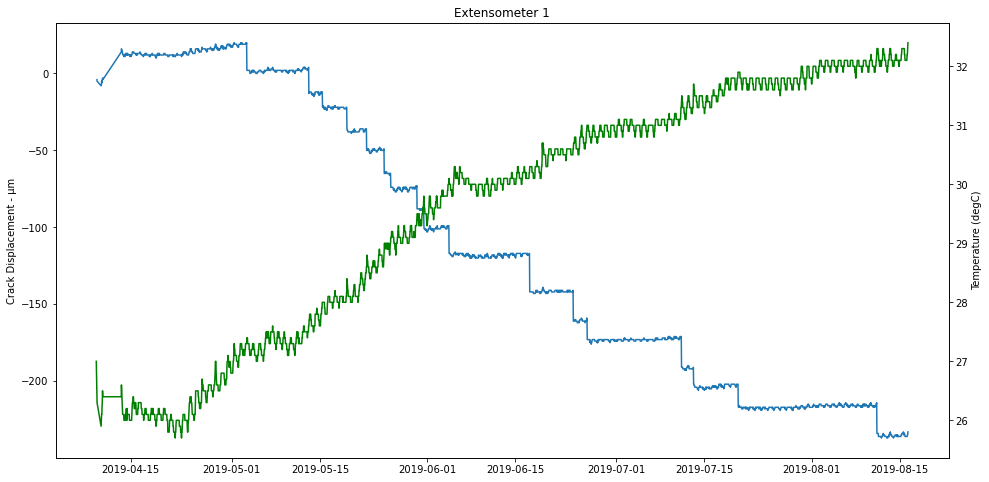

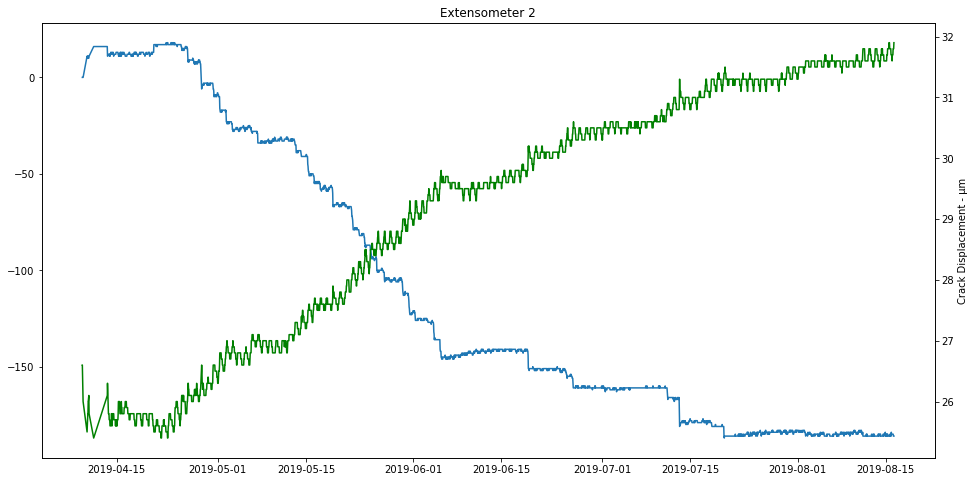

In [5]:
# Plot raw data from two extensometers in a scatter plot
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title("Extensometer 1")

ax.plot(pl.Datetime, pl.Cr_Disp)
ax.set_ylabel('Crack Displacement - μm')

ax2 = ax.twinx()
ax2.plot(pl.Datetime, pl.Air_Temp, color='green')
ax2.set_ylabel('Temperature (degC)')

plt.show()

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title("Extensometer 2")

ax.plot(ext2_df.Datetime, ext2_df.Cr_Disp)

ax2 = ax.twinx()
ax2.plot(ext2_df.Datetime, ext2_df.Air_Temp, color='green')
ax2.set_ylabel('Temperature (degC)')
ax2.set_ylabel('Crack Displacement - μm')

plt.show()

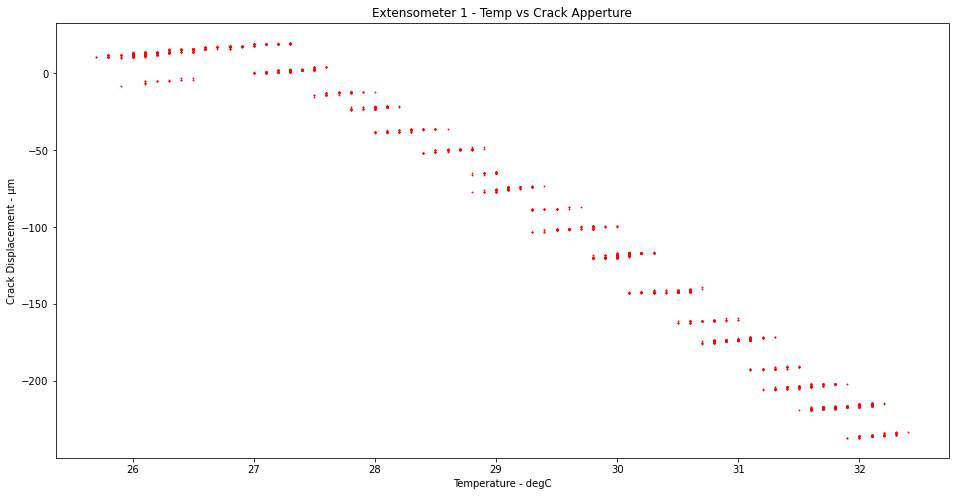

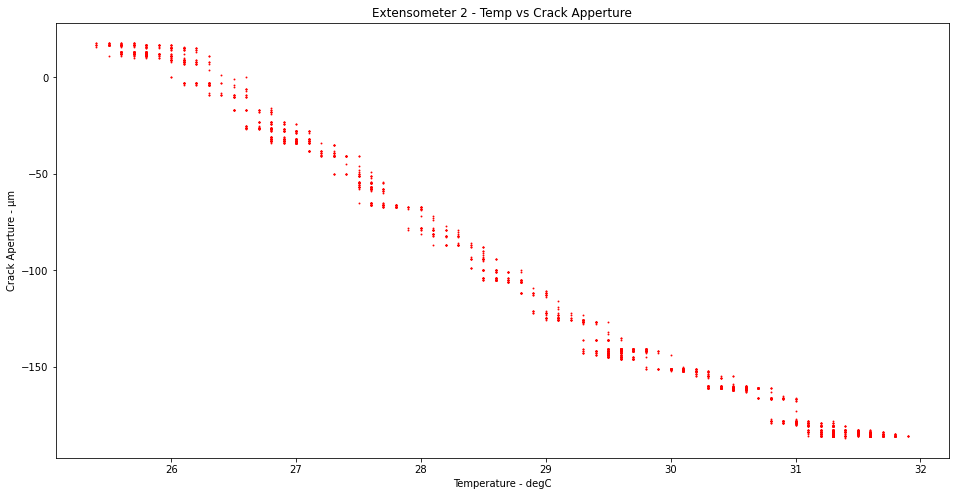

In [6]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title("Extensometer 1 - Temp vs Crack Apperture")
ax.scatter(pl.Air_Temp, pl.Cr_Disp, color='red', s=0.7)
ax.set_ylabel('Crack Displacement - μm')
ax.set_xlabel('Temperature - degC')

plt.show

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title("Extensometer 2 - Temp vs Crack Apperture")
ax.scatter(ext2_df.Air_Temp, ext2_df.Cr_Disp, color='red', s=0.8)
ax.set_ylabel('Crack Aperture - μm')
ax.set_xlabel('Temperature - degC')

plt.show()

In [7]:
df = pl.merge(ext2_df, on='Datetime', how='left').dropna()
df

,Datetime,Air_Temp_x,Cr_Ap_x,diff_x,Cr_Disp_x,Air_Temp_y,Cr_Ap_y,diff_y,Cr_Disp_y
1,2019-04-09 15:20:00,26.4,5084,-4.0,-4.0,26.0,4096.0,0.0,0.0
2,2019-04-09 15:30:00,26.3,5083,-1.0,-5.0,26.0,4096.0,0.0,0.0
4,2019-04-10 08:30:00,26.1,5081,1.0,-7.0,25.7,4106.0,-1.0,10.0
5,2019-04-10 08:40:00,26.1,5082,1.0,-6.0,25.7,4107.0,1.0,11.0
7,2019-04-10 09:00:00,26.1,5083,1.0,-5.0,25.8,4107.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...
3023,2019-08-16 02:51:00,32.1,4852,0.0,-236.0,31.7,3911.0,0.0,-185.0
3024,2019-08-16 03:51:00,32.2,4852,0.0,-236.0,31.8,3911.0,0.0,-185.0
3025,2019-08-16 04:51:00,32.2,4853,1.0,-235.0,31.8,3910.0,-1.0,-186.0
3026,2019-08-16 05:51:00,32.3,4853,0.0,-235.0,31.8,3910.0,0.0,-186.0


In [8]:
df['TotalDisp'] = np.sqrt(df['Cr_Disp_x']**2 + df['Cr_Disp_y']**2)
df['angle'] = np.pi/2 + np.arctan(df.Cr_Disp_x/df.Cr_Disp_y)
df

,Datetime,Air_Temp_x,Cr_Ap_x,diff_x,Cr_Disp_x,Air_Temp_y,Cr_Ap_y,diff_y,Cr_Disp_y,TotalDisp,angle
1,2019-04-09 15:20:00,26.4,5084,-4.0,-4.0,26.0,4096.0,0.0,0.0,4.000000,0.000000
2,2019-04-09 15:30:00,26.3,5083,-1.0,-5.0,26.0,4096.0,0.0,0.0,5.000000,0.000000
4,2019-04-10 08:30:00,26.1,5081,1.0,-7.0,25.7,4106.0,-1.0,10.0,12.206556,0.960070
5,2019-04-10 08:40:00,26.1,5082,1.0,-6.0,25.7,4107.0,1.0,11.0,12.529964,1.071450
7,2019-04-10 09:00:00,26.1,5083,1.0,-5.0,25.8,4107.0,0.0,11.0,12.083046,1.144169
...,...,...,...,...,...,...,...,...,...,...,...
3023,2019-08-16 02:51:00,32.1,4852,0.0,-236.0,31.7,3911.0,0.0,-185.0,299.868304,2.476747
3024,2019-08-16 03:51:00,32.2,4852,0.0,-236.0,31.8,3911.0,0.0,-185.0,299.868304,2.476747
3025,2019-08-16 04:51:00,32.2,4853,1.0,-235.0,31.8,3910.0,-1.0,-186.0,299.701518,2.472063
3026,2019-08-16 05:51:00,32.3,4853,0.0,-235.0,31.8,3910.0,0.0,-186.0,299.701518,2.472063


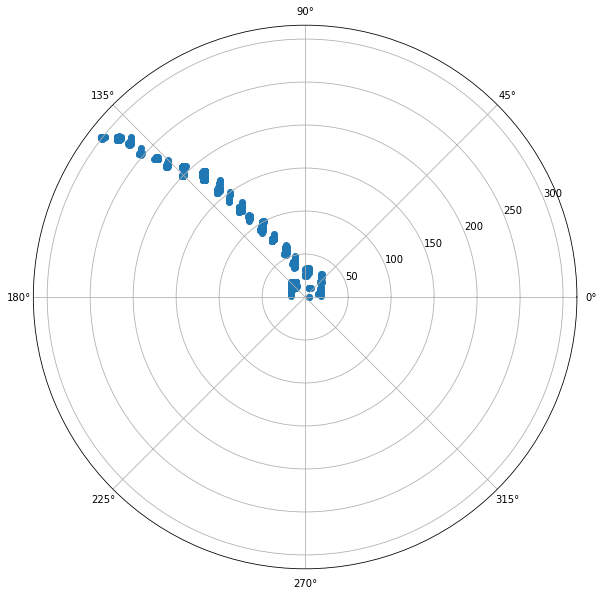

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = 'polar')
c = ax.scatter(df.angle, df.TotalDisp)

In [ ]:
to_plot = to_plot.T.iloc[::-1]

In [ ]:
sns.set()

deg = '\u00b0'

sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,8))
ax = sns.heatmap(to_plot, cmap="coolwarm", cbar_kws={'label':' Temperature ('+deg+'C)'})
ax.set_xticks(change_indices, ['May', 'June', 'July', 'August'], rotation=45, fontsize=12)
ax.set_yticklabels([4.74,4.24,3.75,3.74,2.98,2.06,1.66,0.82,0.6,0.36])
plt.yticks(fontsize=12)
plt.yticks(rotation=0)
ax.set_ylabel('Sensor Elevation (m)', fontsize=14)
ax.set_xlabel('Month', fontsize=14)

#plt.rc('axes', titlesize=16)
#ax.set_xticklabels(labels)
plt.show()